In [1]:
import pandas as pd
from IPython.display import display
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import scipy.stats as stats
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('/kaggle/input/amazon/amazon.csv')

In [4]:
display(data)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [5]:
data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [6]:
data.tail()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","₹2,219","₹3,080",28%,3.6,468,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...","₹1,399","₹1,890",26%,4,"8,031",Fan sweep area: 230 MM ; Noise level: (40 - 45...,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...","Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Havells-Ventilair-230mm-...
1464,B01486F4G6,Borosil Jumbo 1000-Watt Grill Sandwich Maker (...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,863","₹3,690",22%,4.3,"6,987","Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...","AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...","Rajib,Ajay B,Vikas Kahol,PARDEEP,Anindya Prama...","R20RBRZ0WEUJT9,ROKIFK9R2ISSE,R30EEG2FNJSN5I,R2...","Works perfect,Ok good product,Nice Product. Re...",It does it job perfectly..only issue is temp c...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...


In [7]:
data.shape

(1465, 16)

In [8]:
data.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [9]:
data.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

In [10]:
duplicates = data.duplicated()
duplicates.sum()

0

In [11]:
missingValues = data.isnull().sum()
print(missingValues)

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [12]:
data = data.dropna()
missingValues = data.isnull().sum().sum()
print(missingValues)

0


In [13]:
data['category'] = data['category'].astype('category')

In [14]:
data['discounted_price'] = (
    data['discounted_price']
    .str.replace('₹', '')
    .str.replace(',', '')
    .astype(float)
    .astype(int)
)

data['actual_price'] = (
    data['actual_price']
    .str.replace('₹', '')
    .str.replace(',', '')
    .astype(float)
    .astype(int)
)

In [15]:
data['discount_percentage'] = (
    data['discount_percentage']
    .astype(str)
    .str.replace('%', '', regex=False)
    .astype(float) /100
)

In [16]:
data['rating_count'] = data['rating_count'].str.replace(',', '', regex=False).astype(int)

In [17]:
# discounted_price, rating, category, discount_percentage, actual_price. rating_count 

In [18]:
data.dtypes

product_id               object
product_name             object
category               category
discounted_price          int64
actual_price              int64
discount_percentage     float64
rating                   object
rating_count              int64
about_product            object
user_id                  object
user_name                object
review_id                object
review_title             object
review_content           object
img_link                 object
product_link             object
dtype: object

In [19]:
missingValues = data.isnull().sum()
print(missingValues)

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [20]:
row_1279 = data['rating'].iloc[1278]
display(row_1279)

'4.1'

In [21]:
data['rating'] = data['rating'].str.replace(r'[^\d.]+', '', regex=True)

In [22]:
data['rating'] = pd.to_numeric(data['rating'])

In [23]:
empty_string_rows = data[data['rating'] == '']
print("Rows with empty strings in the 'rating' column:")
empty_string_rows

Rows with empty strings in the 'rating' column:


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link


In [24]:
missingValues = data.isnull().sum()
print(missingValues)

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [25]:
data.loc[1279, 'rating'] = 4.1

In [26]:
data['rating'] = data['rating'].astype(float)

In [27]:
row_1279 = data['rating'].iloc[1278]
display(row_1279)

4.1

In [28]:
missingValues = data.isnull().sum()
print(missingValues)

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [29]:
row_1279 = data['rating'].iloc[1278]
display(row_1279)

4.1

In [30]:
data.dtypes

product_id               object
product_name             object
category               category
discounted_price          int64
actual_price              int64
discount_percentage     float64
rating                  float64
rating_count              int64
about_product            object
user_id                  object
user_name                object
review_id                object
review_title             object
review_content           object
img_link                 object
product_link             object
dtype: object

In [31]:
df = data[['discounted_price', 'rating', 'category', 'discount_percentage', 'actual_price', 'rating_count']].copy()

In [32]:
df.dtypes

discounted_price          int64
rating                  float64
category               category
discount_percentage     float64
actual_price              int64
rating_count              int64
dtype: object

In [33]:
df.head()

,discounted_price,rating,category,discount_percentage,actual_price,rating_count
0,399,4.2,Computers&Accessories|Accessories&Peripherals|...,0.64,1099,24269
1,199,4.0,Computers&Accessories|Accessories&Peripherals|...,0.43,349,43994
2,199,3.9,Computers&Accessories|Accessories&Peripherals|...,0.90,1899,7928
3,329,4.2,Computers&Accessories|Accessories&Peripherals|...,0.53,699,94363
4,154,4.2,Computers&Accessories|Accessories&Peripherals|...,0.61,399,16905


In [34]:
# discounted_price, rating, category, discount_percentage, actual_price. rating_count 

### 1. Does the discounted price significantly impact product ratings?


In [35]:
df['rating'].describe()

count    1463.000000
mean        4.096719
std         0.289398
min         2.000000
25%         4.000000
50%         4.100000
75%         4.300000
max         5.000000
Name: rating, dtype: float64

In [36]:
df['discounted_price'].describe()

count     1463.00000
mean      3129.27136
std       6948.22425
min         39.00000
25%        325.00000
50%        799.00000
75%       1999.00000
max      77990.00000
Name: discounted_price, dtype: float64

In [37]:
df.head()

,discounted_price,rating,category,discount_percentage,actual_price,rating_count
0,399,4.2,Computers&Accessories|Accessories&Peripherals|...,0.64,1099,24269
1,199,4.0,Computers&Accessories|Accessories&Peripherals|...,0.43,349,43994
2,199,3.9,Computers&Accessories|Accessories&Peripherals|...,0.90,1899,7928
3,329,4.2,Computers&Accessories|Accessories&Peripherals|...,0.53,699,94363
4,154,4.2,Computers&Accessories|Accessories&Peripherals|...,0.61,399,16905


In [38]:
corr_coefficient, p_value = spearmanr(df['discounted_price'], df['rating'])

print(f'Spearman Correlation Coefficient: {corr_coefficient}')
print(f'P-value: {p_value}')

alpha = 0.05 
if p_value < alpha:
    print("There is a correlation between discounted price and ratings.")
else:
    print("There is no correlation between discounted price and ratings.")

Spearman Correlation Coefficient: 0.07996883822073247
P-value: 0.002205758448349311
There is a correlation between discounted price and ratings.


In [39]:
Q1 = df['discounted_price'].quantile(0.1)
Q3 = df['discounted_price'].quantile(0.9)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df[(df['discounted_price'] < lower_bound) | (df['discounted_price'] > upper_bound)]

print("Outliers based on IQR method:")

num_outliers_iqr = outliers_iqr.shape[0]
print(f"Number of outliers based on IQR method: {num_outliers_iqr}")
outliers_iqr

Outliers based on IQR method:
Number of outliers based on IQR method: 51


,discounted_price,rating,category,discount_percentage,actual_price,rating_count
38,32999,4.2,"Electronics|HomeTheater,TV&Video|Televisions|S...",0.28,45999,7298
61,32990,4.3,"Electronics|HomeTheater,TV&Video|Televisions|S...",0.31,47900,7109
72,26999,4.2,"Electronics|HomeTheater,TV&Video|Televisions|S...",0.37,42999,45238
85,29999,4.2,"Electronics|HomeTheater,TV&Video|Televisions|S...",0.25,39999,7298
86,27999,4.3,"Electronics|HomeTheater,TV&Video|Televisions|S...",0.32,40990,4703
87,30990,4.3,"Electronics|HomeTheater,TV&Video|Televisions|S...",0.41,52900,7109
91,24999,4.2,"Electronics|HomeTheater,TV&Video|Televisions|S...",0.22,31999,34899
103,21999,4.2,"Electronics|HomeTheater,TV&Video|Televisions|S...",0.27,29999,32840
108,37999,4.3,"Electronics|HomeTheater,TV&Video|Televisions|S...",0.42,65000,3587
123,20990,4.1,"Electronics|HomeTheater,TV&Video|Televisions|S...",0.53,44990,1259


In [40]:
df_no_outliers = df[(df['discounted_price'] >= lower_bound) & (df['discounted_price'] <= upper_bound)]
df_no_outliers

,discounted_price,rating,category,discount_percentage,actual_price,rating_count
0,399,4.2,Computers&Accessories|Accessories&Peripherals|...,0.64,1099,24269
1,199,4.0,Computers&Accessories|Accessories&Peripherals|...,0.43,349,43994
2,199,3.9,Computers&Accessories|Accessories&Peripherals|...,0.90,1899,7928
3,329,4.2,Computers&Accessories|Accessories&Peripherals|...,0.53,699,94363
4,154,4.2,Computers&Accessories|Accessories&Peripherals|...,0.61,399,16905
...,...,...,...,...,...,...
1460,379,4.0,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,0.59,919,1090
1461,2280,4.1,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,0.25,3045,4118
1462,2219,3.6,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",0.28,3080,468
1463,1399,4.0,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",0.26,1890,8031


In [41]:
corr_coefficient, p_value = spearmanr(df_no_outliers['discounted_price'], df_no_outliers['rating'])

print(f'Spearman Correlation Coefficient: {corr_coefficient}')
print(f'P-value: {p_value}')

alpha = 0.05 
if p_value < alpha:
    print("There is a correlation between discounted price and ratings.")
else:
    print("There is no correlation between discounted price and ratings.")

Spearman Correlation Coefficient: 0.04998605508658357
P-value: 0.06040636219485306
There is no correlation between discounted price and ratings.


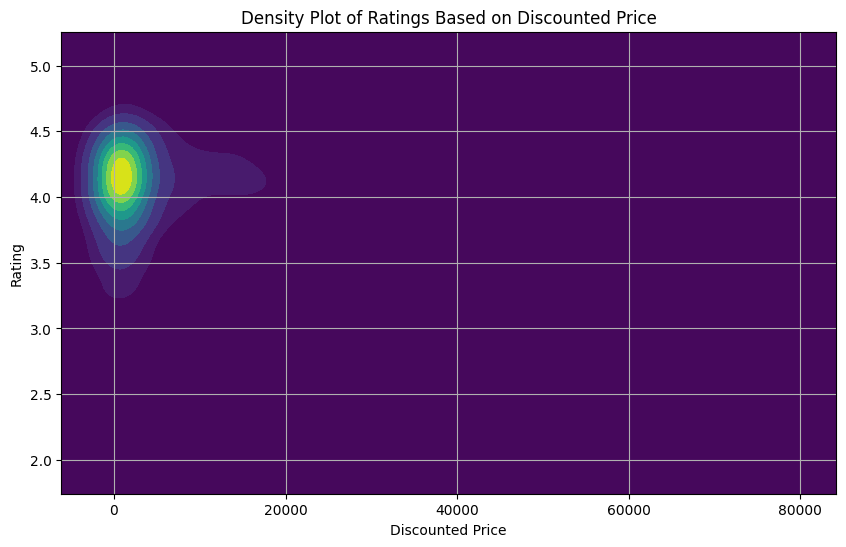

In [42]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='discounted_price', y='rating', fill=True, cmap='viridis', thresh=0)
plt.title('Density Plot of Ratings Based on Discounted Price')
plt.xlabel('Discounted Price')
plt.ylabel('Rating')
plt.grid()
plt.show()

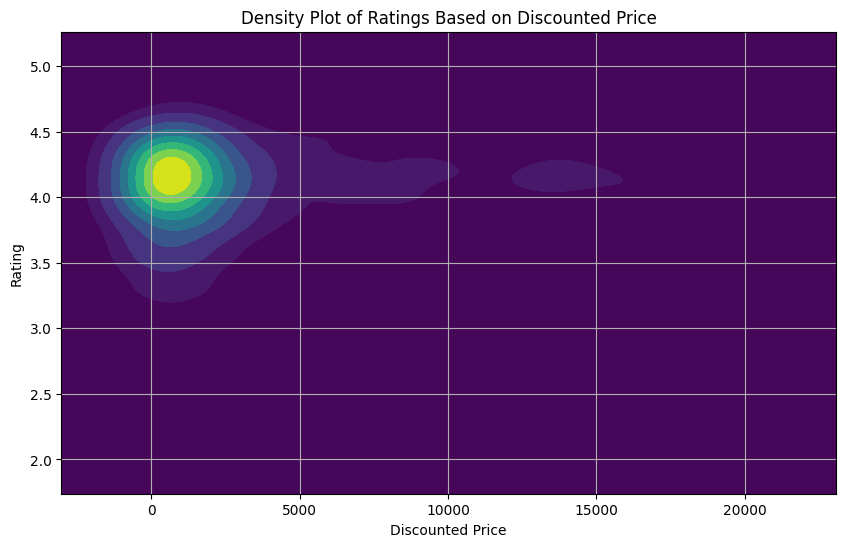

In [43]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_no_outliers, x='discounted_price', y='rating', fill=True, cmap='viridis', thresh=0)
plt.title('Density Plot of Ratings Based on Discounted Price')
plt.xlabel('Discounted Price')
plt.ylabel('Rating')
plt.grid()
plt.show()

### 2. Are product categories and high/low ratings independent?

In [44]:
df['rating_category'] = pd.cut(df['rating'], bins=[-1, 4, 5], labels=['Low', 'High'])

contingencyTable = pd.crosstab(df['category'], df['rating_category'])

chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingencyTable)

print(f'Chi-Square Statistic: {chi2_stat}')
print(f'P-value: {p_value}')
print(f'Degrees of Freedom: {dof}')

alpha = 0.05
if p_value < alpha:
    print("There is a significant relationship between product category and rating.")
else:
    print("There is no significant relationship between product category and rating.")

Chi-Square Statistic: 385.099570791536
P-value: 1.9420432796265063e-12
Degrees of Freedom: 210
There is a significant relationship between product category and rating.


### 3. Is there a significant difference in ratings between high-discount and lowdiscount products?

In [45]:
meanH = df[df['discount_percentage'] > 0.5]['rating'].mean()
meanL = df[df['discount_percentage'] <= 0.5]['rating'].mean()
nH = df[df['discount_percentage'] > 0.5]['rating'].count()
nL = df[df['discount_percentage'] <= 0.5]['rating'].count()

print(f'Mean Rating for High Discount Products: {meanH}')
print(f'Mean Rating for Low Discount Products: {meanL}')

t_stat, p_value = stats.ttest_ind(df[df['discount_percentage'] > 0.5]['rating'], df[df['discount_percentage'] <= 0.5]['rating'], equal_var=False)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("There is a difference in ratings between high-discount and low-discount products.")
else:
    print("There is no significant difference in ratings between high-discount and low-discount products.")

Mean Rating for High Discount Products: 4.063059163059163
Mean Rating for Low Discount Products: 4.127012987012987
T-statistic: -4.214724249588272
P-value: 2.663161215720583e-05
There is a difference in ratings between high-discount and low-discount products.


In [46]:
print(f"Number of High Discount Products: {len(df[df['discount_percentage'] > 0.5])}")
print(f"Number of Low Discount Products: {len(df[df['discount_percentage'] <= 0.5])}")

Number of High Discount Products: 693
Number of Low Discount Products: 770


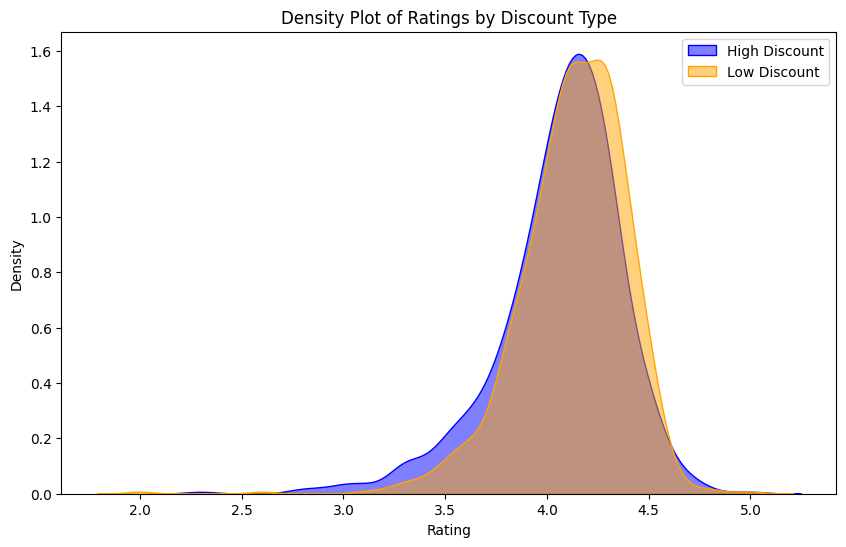

In [47]:
df['Discount Type'] = ['High Discount' if x > 0.5 else 'Low Discount' for x in df['discount_percentage']]

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Discount Type'] == 'High Discount'], x='rating', fill=True, label='High Discount', color='blue', alpha=0.5)
sns.kdeplot(data=df[df['Discount Type'] == 'Low Discount'], x='rating', fill=True, label='Low Discount', color='orange', alpha=0.5)

plt.title('Density Plot of Ratings by Discount Type')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.legend()
plt.show()

### 4. Do more expensive products receive higher ratings on average?

In [48]:
df['actual_price'].describe()

count      1463.000000
mean       5451.066986
std       10881.018913
min          39.000000
25%         800.000000
50%        1690.000000
75%        4312.500000
max      139900.000000
Name: actual_price, dtype: float64

In [49]:
Q1 = df['actual_price'].quantile(0.1)
Q3 = df['actual_price'].quantile(0.9)
IQR = Q3 - Q1
num = df[(df['actual_price'] < Q1 - 1.5 * IQR) | (df['actual_price'] > Q3 + 1.5 * IQR)].shape[0]
df[(df['actual_price'] < Q1 - 1.5 * IQR) | (df['actual_price'] > Q3 + 1.5 * IQR)]

,discounted_price,rating,category,discount_percentage,actual_price,rating_count,rating_category,Discount Type
38,32999,4.2,"Electronics|HomeTheater,TV&Video|Televisions|S...",0.28,45999,7298,High,Low Discount
61,32990,4.3,"Electronics|HomeTheater,TV&Video|Televisions|S...",0.31,47900,7109,High,Low Discount
72,26999,4.2,"Electronics|HomeTheater,TV&Video|Televisions|S...",0.37,42999,45238,High,Low Discount
85,29999,4.2,"Electronics|HomeTheater,TV&Video|Televisions|S...",0.25,39999,7298,High,Low Discount
86,27999,4.3,"Electronics|HomeTheater,TV&Video|Televisions|S...",0.32,40990,4703,High,Low Discount
87,30990,4.3,"Electronics|HomeTheater,TV&Video|Televisions|S...",0.41,52900,7109,High,Low Discount
94,18990,4.2,"Electronics|HomeTheater,TV&Video|Televisions|S...",0.54,40990,6659,High,High Discount
108,37999,4.3,"Electronics|HomeTheater,TV&Video|Televisions|S...",0.42,65000,3587,High,Low Discount
123,20990,4.1,"Electronics|HomeTheater,TV&Video|Televisions|S...",0.53,44990,1259,High,High Discount
124,32999,4.2,"Electronics|HomeTheater,TV&Video|Televisions|S...",0.27,44999,45238,High,Low Discount


In [50]:
dfAP = df[(df['actual_price'] >= Q1 - 1.5 * IQR) & (df['actual_price'] <= Q3 + 1.5 * IQR)]
dfAP

,discounted_price,rating,category,discount_percentage,actual_price,rating_count,rating_category,Discount Type
0,399,4.2,Computers&Accessories|Accessories&Peripherals|...,0.64,1099,24269,High,High Discount
1,199,4.0,Computers&Accessories|Accessories&Peripherals|...,0.43,349,43994,Low,Low Discount
2,199,3.9,Computers&Accessories|Accessories&Peripherals|...,0.90,1899,7928,Low,High Discount
3,329,4.2,Computers&Accessories|Accessories&Peripherals|...,0.53,699,94363,High,High Discount
4,154,4.2,Computers&Accessories|Accessories&Peripherals|...,0.61,399,16905,High,High Discount
...,...,...,...,...,...,...,...,...
1460,379,4.0,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,0.59,919,1090,Low,High Discount
1461,2280,4.1,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,0.25,3045,4118,High,Low Discount
1462,2219,3.6,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",0.28,3080,468,Low,Low Discount
1463,1399,4.0,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",0.26,1890,8031,Low,Low Discount


In [51]:
dfAP['price_group'] = pd.qcut(dfAP['actual_price'], q=3, labels=['Low', 'Medium', 'High'])

anova = stats.f_oneway(
    dfAP[dfAP['price_group'] == 'Low']['rating'],
    dfAP[dfAP['price_group'] == 'Medium']['rating'],
    dfAP[dfAP['price_group'] == 'High']['rating'])

f_statistic = anova.statistic
p_value = anova.pvalue

print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

alpha = 0.04
if p_value < alpha:
    print("There is a significant difference in ratings across price groups.")
else:
    print("There is no significant difference in ratings across price groups.")

F-statistic: 0.43322142799610375
P-value: 0.6485024496030625
There is no significant difference in ratings across price groups.


In [52]:
df.head()

,discounted_price,rating,category,discount_percentage,actual_price,rating_count,rating_category,Discount Type
0,399,4.2,Computers&Accessories|Accessories&Peripherals|...,0.64,1099,24269,High,High Discount
1,199,4.0,Computers&Accessories|Accessories&Peripherals|...,0.43,349,43994,Low,Low Discount
2,199,3.9,Computers&Accessories|Accessories&Peripherals|...,0.90,1899,7928,Low,High Discount
3,329,4.2,Computers&Accessories|Accessories&Peripherals|...,0.53,699,94363,High,High Discount
4,154,4.2,Computers&Accessories|Accessories&Peripherals|...,0.61,399,16905,High,High Discount


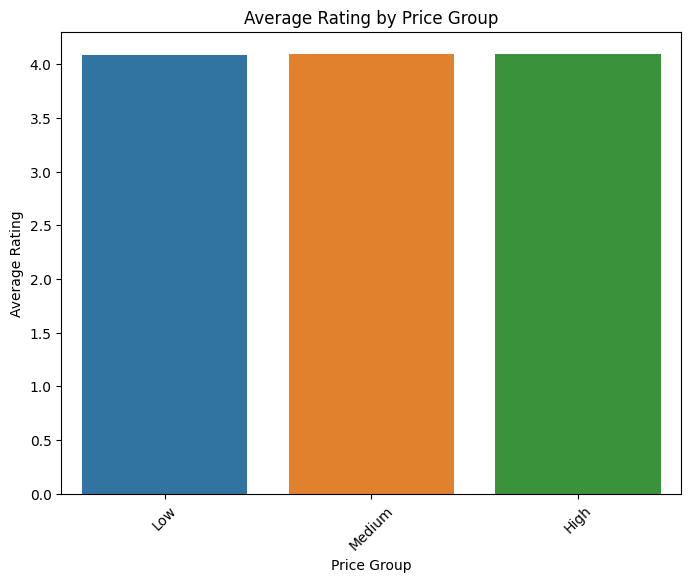

In [53]:
plt.figure(figsize=(8, 6))
sns.barplot(x='price_group', y='rating', data=dfAP, estimator='mean', ci=None)
plt.title('Average Rating by Price Group')
plt.xlabel('Price Group')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

### 5. Does the distribution of rating counts follow a normal distribution?

In [54]:
Q1 = df['rating_count'].quantile(0.1)
Q3 = df['rating_count'].quantile(0.9)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df[(df['rating_count'] < lower_bound) | (df['rating_count'] > upper_bound)]

print("Outliers based on IQR method:")

num_outliers_iqr = outliers_iqr.shape[0]
print(f"Number of outliers based on IQR method: {num_outliers_iqr}")
outliers_iqr

Outliers based on IQR method:
Number of outliers based on IQR method: 47


,discounted_price,rating,category,discount_percentage,actual_price,rating_count,rating_category,Discount Type
8,499,4.2,Computers&Accessories|NetworkingDevices|Networ...,0.50,999,179691,High,Low Discount
12,219,4.4,"Electronics|HomeTheater,TV&Video|Accessories|C...",0.69,700,426973,High,High Discount
40,209,4.5,Computers&Accessories|Accessories&Peripherals|...,0.70,695,107687,High,High Discount
47,309,4.4,"Electronics|HomeTheater,TV&Video|Accessories|C...",0.35,475,426973,High,Low Discount
56,649,4.2,Computers&Accessories|NetworkingDevices|Networ...,0.54,1399,179691,High,High Discount
65,309,4.4,"Electronics|HomeTheater,TV&Video|Accessories|C...",0.78,1400,426973,High,High Discount
143,749,4.2,Computers&Accessories|NetworkingDevices|Networ...,0.44,1339,179692,High,Low Discount
191,709,4.1,Computers&Accessories|Accessories&Peripherals|...,0.65,1999,178817,High,High Discount
337,2049,4.3,Electronics|Mobiles&Accessories|MobileAccessor...,0.07,2199,178912,High,Low Discount
345,1299,4.0,Electronics|Mobiles&Accessories|Smartphones&Ba...,0.19,1599,128311,Low,Low Discount


In [55]:
dfRC = df[(df['rating_count'] >= Q1 - 1.5 * IQR) & (df['rating_count'] <= Q3 + 1.5 * IQR)]
dfRC

,discounted_price,rating,category,discount_percentage,actual_price,rating_count,rating_category,Discount Type
0,399,4.2,Computers&Accessories|Accessories&Peripherals|...,0.64,1099,24269,High,High Discount
1,199,4.0,Computers&Accessories|Accessories&Peripherals|...,0.43,349,43994,Low,Low Discount
2,199,3.9,Computers&Accessories|Accessories&Peripherals|...,0.90,1899,7928,Low,High Discount
3,329,4.2,Computers&Accessories|Accessories&Peripherals|...,0.53,699,94363,High,High Discount
4,154,4.2,Computers&Accessories|Accessories&Peripherals|...,0.61,399,16905,High,High Discount
...,...,...,...,...,...,...,...,...
1460,379,4.0,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,0.59,919,1090,Low,High Discount
1461,2280,4.1,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,0.25,3045,4118,High,Low Discount
1462,2219,3.6,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",0.28,3080,468,Low,Low Discount
1463,1399,4.0,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",0.26,1890,8031,Low,Low Discount


In [56]:
shapiro, shapirop = stats.shapiro(data['rating_count'])

mu = np.mean(dfRC['rating_count'])
std = np.std(dfRC['rating_count'])
ks, ksp = stats.kstest(dfRC['rating_count'], 'norm', args=(mu, std))

print(f'Shapiro-Wilk Test Statistic: {shapiro}, P-value: {shapirop}')
print(f'Kolmogorov-Smirnov Test Statistic: {ks}, P-value: {ksp}')

alpha = 0.05
if shapirop < alpha:
    print("The distribution of rating counts does not follow a normal distribution (Shapiro-Wilk Test).")
else:
    print("The distribution of rating counts follows a normal distribution (Shapiro-Wilk Test).")

if ksp < alpha:
    print("The distribution of rating counts does not follow a normal distribution (Kolmogorov-Smirnov Test).")
else:
    print("The distribution of rating counts follows a normal distribution (Kolmogorov-Smirnov Test).")

Shapiro-Wilk Test Statistic: 0.41417703073489764, P-value: 4.337208328116746e-56
Kolmogorov-Smirnov Test Statistic: 0.24882251439681702, P-value: 1.0195717874079563e-77
The distribution of rating counts does not follow a normal distribution (Shapiro-Wilk Test).
The distribution of rating counts does not follow a normal distribution (Kolmogorov-Smirnov Test).


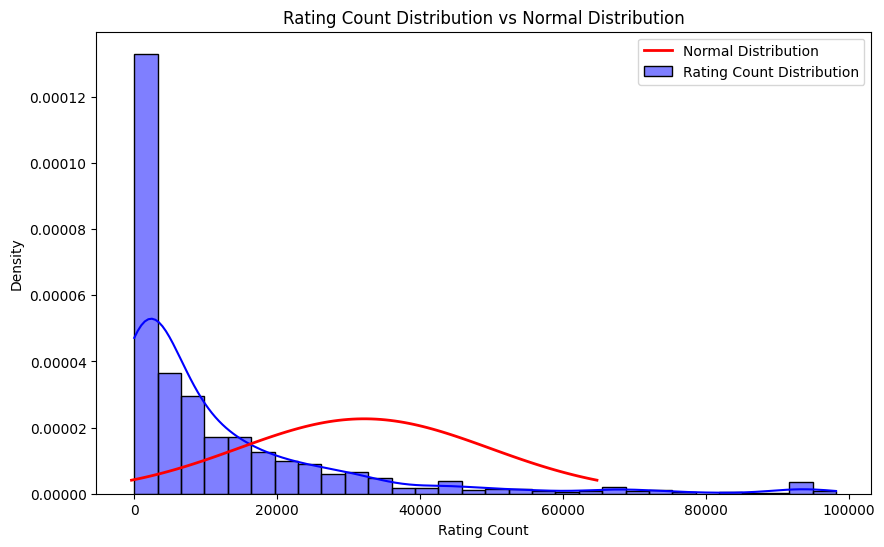

In [57]:
mu = np.mean(dfRC['rating_count'])
std = np.std(dfRC['rating_count'])

x = np.linspace(mu - 0.7*std, mu + 3*std, 100)
normal_dist = stats.norm.pdf(x, mu+1.15*std, std)


plt.figure(figsize=(10, 6))
sns.histplot(dfRC['rating_count'], bins=30, kde=True, stat='density', color='blue', label='Rating Count Distribution')
plt.plot(x, normal_dist, 'r-', label='Normal Distribution', linewidth=2)
plt.title('Rating Count Distribution vs Normal Distribution')
plt.xlabel('Rating Count')
plt.ylabel('Density')
plt.legend()
plt.show()